In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Dados da planilha Excel, estruturados como um dicionário
dados = {
  "8mm": {
    "2": {
      "H (mm)": [1.04, 0.96, 0.92, 0.88, 0.96],
      "Q (mm/s)": [0.13, 0.121, 0.124, 0.119, 0.125]
    },
    "4": {
      "H (mm)": [2.54, 2.4, 2.38, 2.4, 2.38],
      "Q (mm/s)": [0.201, 0.194, 0.193, 0.194, 0.193]
    },
    "6": {
      "H (mm)": [5.4, 5.54, 5.6, 5.38, 5.6],
      "Q (mm/s)": [0.289, 0.289, 0.289, 0.289, 0.289]
    },
    "8": {
      "H (mm)": [9.2, 9.6, 9.4, 9.56, 9.52],
      "Q (mm/s)": [0.376, 0.384, 0.38, 0.383, 0.381]
    },
    "10": {
      "H (mm)": [13.52, 13.56, 13.64, 13.74, 13.84],
      "Q (mm/s)": [0.456, 0.458, 0.458, 0.459, 0.461]
    },
    "12": {
      "H (mm)": [16, 15.98, 15.96, 15.96, 15.94],
      "Q (mm/s)": [0.494, 0.494, 0.494, 0.494, 0.493]
    }
  },
  "15mm": {
    "2": {
      "H (mm)": [0.2, 0.2, 0.2, 0.2, 0.2],
      "Q (mm/s)": [0.217, 0.217, 0.217, 0.217, 0.217]
    },
    "4": {
      "H (mm)": [1.28, 1.3, 1.3, 1.3, 1.3],
      "Q (mm/s)": [0.52, 0.524, 0.524, 0.524, 0.524]
    },
    "6": {
      "H (mm)": [3.78, 3.78, 3.78, 3.76, 3.74],
      "Q (mm/s)": [0.878, 0.878, 0.878, 0.875, 0.873]
    },
    "8": {
      "H (mm)": [6.34, 6.28, 6.24, 6.2, 6.2],
      "Q (mm/s)": [1.129, 1.122, 1.119, 1.117, 1.117]
    },
    "10": {
      "H (mm)": [10.52, 10.54, 10.54, 10.52, 10.5],
      "Q (mm/s)": [1.446, 1.448, 1.448, 1.446, 1.445]
    },
    "12": {
      "H (mm)": [13.98, 14, 13.92, 13.94, 13.98],
      "Q (mm/s)": [1.663, 1.664, 1.659, 1.66, 1.663]
    }
  },
  "22mm": {
    "2": {
      "H (mm)": [0.7, 0.66, 0.62, 0.6, 0.58],
      "Q (mm/s)": [0.39, 0.379, 0.368, 0.363, 0.357]
    },
    "4": {
      "H (mm)": [1.5, 1.52, 1.54, 1.56, 1.58],
      "Q (mm/s)": [0.562, 0.565, 0.569, 0.572, 0.576]
    },
    "6": {
      "H (mm)": [3.36, 3.34, 3.32, 3.3, 3.28],
      "Q (mm/s)": [0.829, 0.827, 0.824, 0.822, 0.819]
    },
    "8": {
      "H (mm)": [5.42, 5.44, 5.46, 5.48, 5.5],
      "Q (mm/s)": [1.046, 1.048, 1.05, 1.052, 1.053]
    },
    "10": {
      "H (mm)": [6.89, 6.77, 6.73, 6.74, 6.84],
      "Q (mm/s)": [1.171, 1.149, 1.143, 1.146, 1.167]
    },
    "12": {
      "H (mm)": [8.36, 8.38, 8.4, 8.36, 8.26],
      "Q (mm/s)": [1.292, 1.294, 1.295, 1.292, 1.285]
    }
  }
}

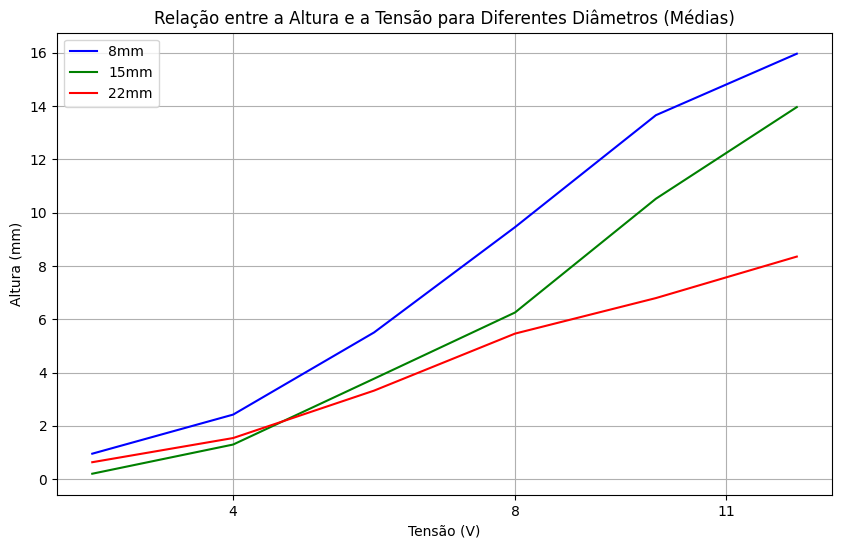

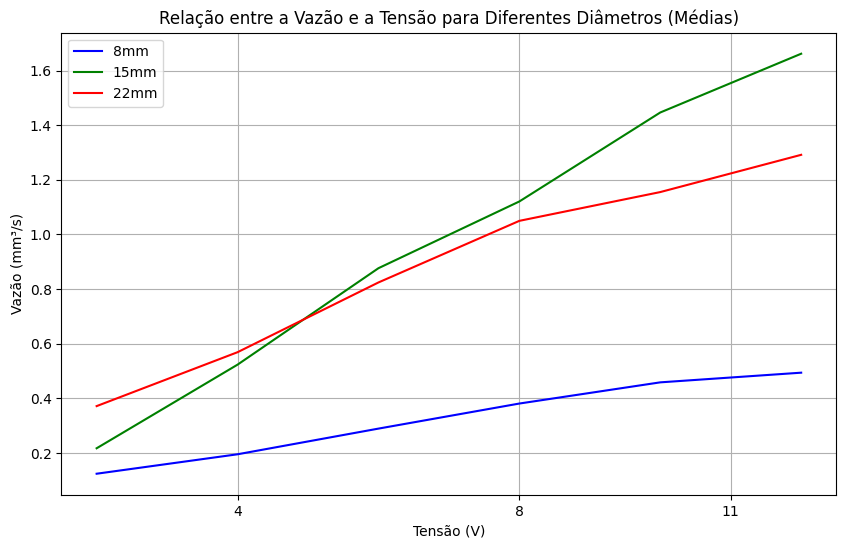

In [4]:
# Cria um DataFrame a partir dos dados
df = pd.DataFrame()

for diametro, dados_diametro in dados.items():
    for tensao, valores in dados_diametro.items():
        df_temp = pd.DataFrame(valores)
        df_temp["Diâmetro"] = diametro
        # Converte "Tensão" para numérica
        df_temp["Tensão"] = int(tensao.replace("V", ""))
        df = pd.concat([df, df_temp], ignore_index=True)

# Define as cores para cada diâmetro
cores = {"8mm": "blue", "15mm": "green", "22mm": "red"}

# Cria o gráfico H x V com linhas ligando as médias
plt.figure(figsize=(10, 6))
for diametro in df["Diâmetro"].unique():
    df_diametro = df[df["Diâmetro"] == diametro]
    medias_h = df_diametro.groupby("Tensão")["H (mm)"].mean()
    plt.plot(medias_h.index, medias_h.values, color=cores[diametro], label=diametro)

plt.xlabel("Tensão (V)")
plt.ylabel("Altura (mm)")
plt.title("Relação entre a Altura e a Tensão para Diferentes Diâmetros (Médias)")
plt.xticks([4, 8, 11])  # Define os ticks do eixo X
plt.legend()
plt.grid(True)
plt.show()

# Cria o gráfico Q x V com linhas ligando as médias
plt.figure(figsize=(10, 6))
for diametro in df["Diâmetro"].unique():
    df_diametro = df[df["Diâmetro"] == diametro]
    medias_q = df_diametro.groupby("Tensão")["Q (mm/s)"].mean()
    plt.plot(medias_q.index, medias_q.values, color=cores[diametro], label=diametro)

plt.xlabel("Tensão (V)")
plt.ylabel("Vazão (mm³/s)")
plt.title("Relação entre a Vazão e a Tensão para Diferentes Diâmetros (Médias)")
plt.xticks([4, 8, 11])  # Define os ticks do eixo X
plt.legend()
plt.grid(True)
plt.show()

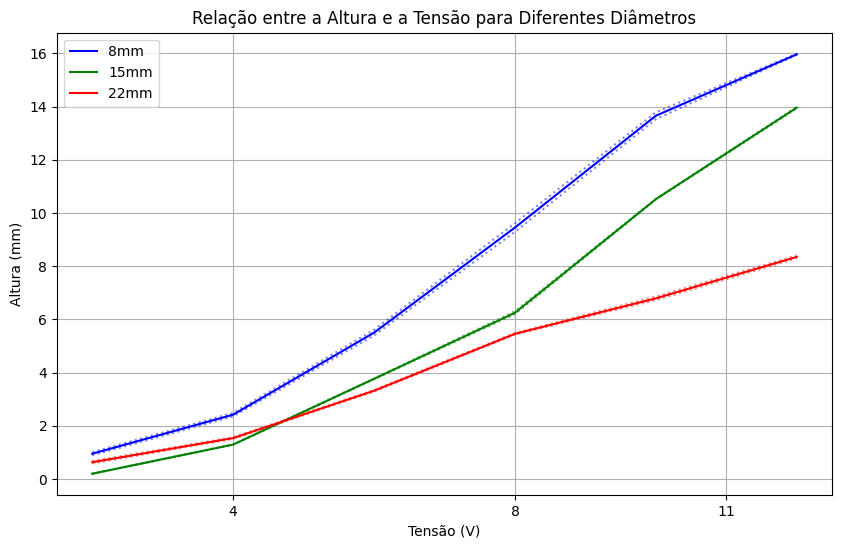

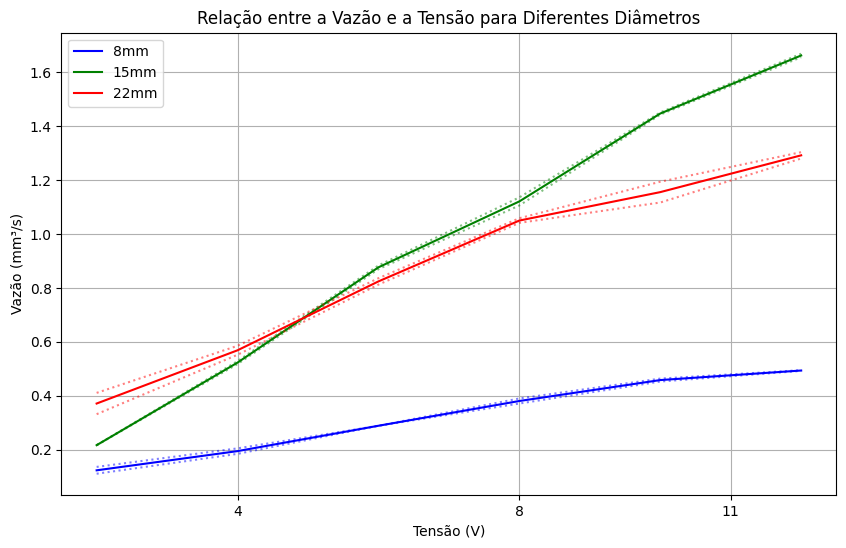

In [5]:
# Cria o gráfico H x V com linhas ligando as médias e barras de erro
plt.figure(figsize=(10, 6))
for diametro in df["Diâmetro"].unique():
    df_diametro = df[df["Diâmetro"] == diametro]
    medias_h = df_diametro.groupby("Tensão")["H (mm)"].mean()
    desvios_h = df_diametro.groupby("Tensão")["H (mm)"].std()

    # Cálculo de máximos e mínimos de incerteza
    maximos_h = medias_h + desvios_h
    minimos_h = medias_h - desvios_h

    # Plota as linhas contínuas para as médias
    plt.plot(medias_h.index, medias_h.values, "-", color=cores[diametro], label=diametro)

    # Plota as linhas pontilhadas para máximos e mínimos
    plt.plot(maximos_h.index, maximos_h.values, ":", color=cores[diametro], alpha=0.5)
    plt.plot(minimos_h.index, minimos_h.values, ":", color=cores[diametro], alpha=0.5)

plt.xlabel("Tensão (V)")
plt.ylabel("Altura (mm)")
plt.title("Relação entre a Altura e a Tensão para Diferentes Diâmetros")
plt.xticks([4, 8, 11])
plt.legend()
plt.grid(True)
plt.show()

# Cria o gráfico Q x V com linhas ligando as médias e barras de erro
plt.figure(figsize=(10, 6))
for diametro in df["Diâmetro"].unique():
    df_diametro = df[df["Diâmetro"] == diametro]
    medias_q = df_diametro.groupby("Tensão")["Q (mm/s)"].mean()
    desvios_q = df_diametro.groupby("Tensão")["Q (mm/s)"].std()*3

    # Cálculo de máximos e mínimos de incerteza
    maximos_q = medias_q + desvios_q
    minimos_q = medias_q - desvios_q

    # Plota as linhas contínuas para as médias
    plt.plot(medias_q.index, medias_q.values, "-", color=cores[diametro], label=diametro)

    # Plota as linhas pontilhadas para máximos e mínimos
    plt.plot(maximos_q.index, maximos_q.values, ":", color=cores[diametro], alpha=0.5)
    plt.plot(minimos_q.index, minimos_q.values, ":", color=cores[diametro], alpha=0.5)

plt.xlabel("Tensão (V)")
plt.ylabel("Vazão (mm³/s)")
plt.title("Relação entre a Vazão e a Tensão para Diferentes Diâmetros")
plt.xticks([4, 8, 11])
plt.legend()
plt.grid(True)
plt.show()

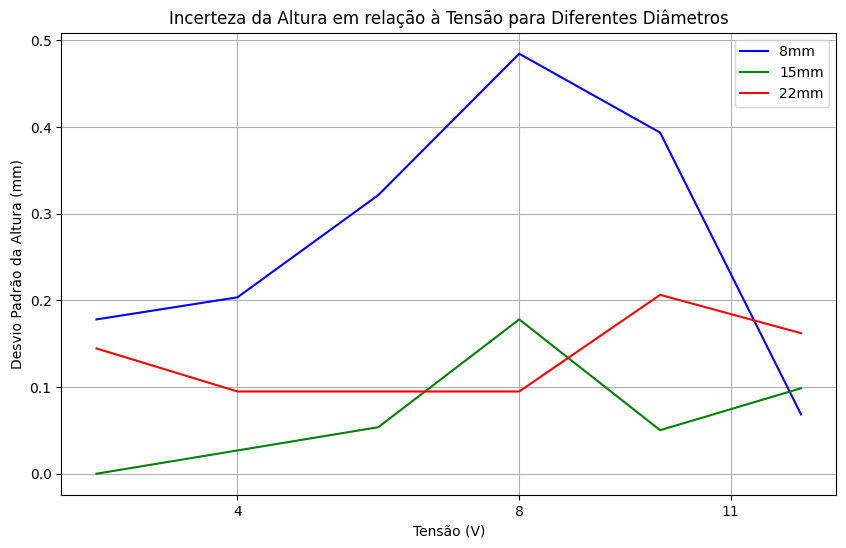

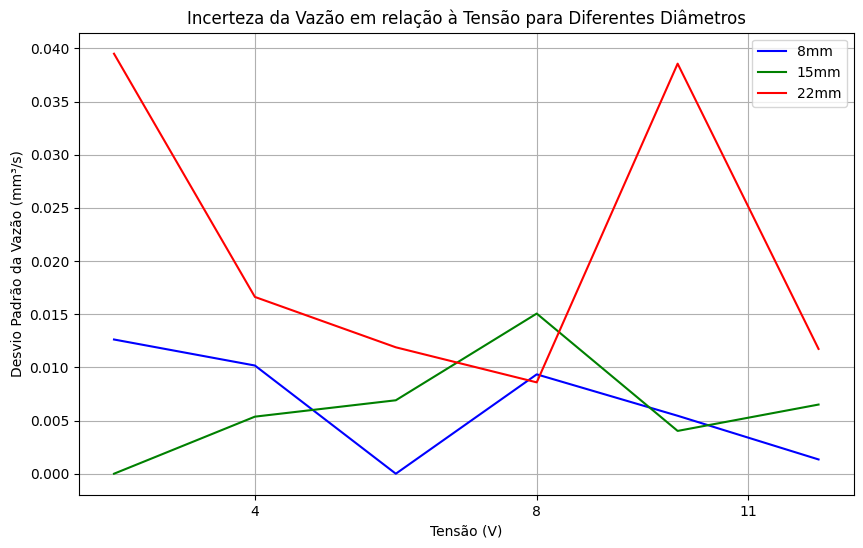

In [ ]:
# Cria o gráfico da incerteza vs tensão para H (mm)
plt.figure(figsize=(10, 6))
for diametro in df["Diâmetro"].unique():
    df_diametro = df[df["Diâmetro"] == diametro]
    desvios_h = df_diametro.groupby("Tensão")["H (mm)"].std()*3
    plt.plot(desvios_h.index, desvios_h.values, "-", color=cores[diametro], label=diametro)

plt.xlabel("Tensão (V)")
plt.ylabel("Desvio Padrão da Altura (mm)")
plt.title("Incerteza da Altura em relação à Tensão para Diferentes Diâmetros")
plt.xticks([4, 8, 11])
plt.legend()
plt.grid(True)
plt.show()

# Cria o gráfico da incerteza vs tensão para Q (mm/s)
plt.figure(figsize=(10, 6))
for diametro in df["Diâmetro"].unique():
    df_diametro = df[df["Diâmetro"] == diametro]
    desvios_q = df_diametro.groupby("Tensão")["Q (mm/s)"].std()*3
    plt.plot(desvios_q.index, desvios_q.values, "-", color=cores[diametro], label=diametro)

plt.xlabel("Tensão (V)")
plt.ylabel("Desvio Padrão da Vazão (mm³/s)")
plt.title("Incerteza da Vazão em relação à Tensão para Diferentes Diâmetros")
plt.xticks([4, 8, 11])
plt.legend()
plt.grid(True)
plt.show()